In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


/home/malzantot/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/malzantot/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/malzantot/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/malzantot/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [2]:
import image_utils
import model_utils
from neuromask import NeuroMask

## Load Incetpion-v3 classification model

In [3]:
tf.reset_default_graph()
sess = tf.get_default_session()

if sess:
    sess.close()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
model = model_utils.InceptionModel()




W0826 14:51:43.218857 139745200453440 deprecation_wrapper.py:119] From /home/malzantot/Nesl/neuromask/model_utils.py:24: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 14:51:46.037572 139745200453440 deprecation_wrapper.py:119] From /home/malzantot/Nesl/neuromask/model_utils.py:28: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



## Wrap the model with NeuroMask engine

In [4]:
mask_net = NeuroMask(model, coeffs=(0.4, 0.35,0.03),temp=0.3)


W0826 14:51:46.290739 139745200453440 deprecation_wrapper.py:119] From /home/malzantot/Nesl/neuromask/neuromask.py:30: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0826 14:51:46.291948 139745200453440 deprecation.py:506] From /home/malzantot/Nesl/neuromask/neuromask.py:32: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0826 14:51:48.019243 139745200453440 deprecation.py:323] From /home/malzantot/Nesl/neuromask/neuromask.py:51: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W08

## Load example image to try with

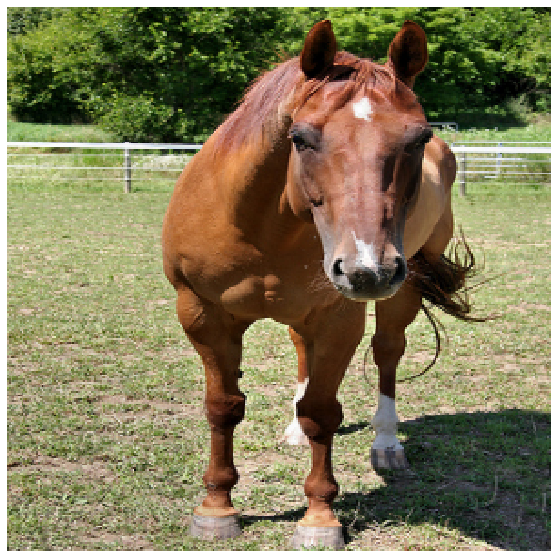

In [5]:
TEST_IMG_PATH = './images/340.00011600.jpg'
test_img = image_utils.load_image(TEST_IMG_PATH)
image_utils.display_image(test_img)
None

## Generate Explanation

In [6]:
mask_net.init_model(sess)  # It is important to call this function eachtime befor running neuromask on a new input
mask_result =mask_net.explain(sess, test_img, iters=2000)

W0826 14:52:04.247921 139745200453440 deprecation_wrapper.py:119] From /home/malzantot/Nesl/neuromask/neuromask.py:60: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

W0826 14:52:05.730257 139745200453440 deprecation.py:323] From /home/malzantot/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Original prediction =  [340]
0 - [291] - 604.470703125
50 - [340] - 598.353515625
100 - [340] - 547.8922729492188
150 - [340] - 365.6262512207031
200 - [340] - 204.63705444335938
250 - [340] - 101.30936431884766
300 - [340] - 42.2427864074707
350 - [340] - 14.257512092590332
400 - [340] - 4.955352783203125
450 - [340] - 3.807372808456421
500 - [340] - 3.6675169467926025
550 - [340] - 3.740464448928833
600 - [340] - 3.641409397125244
650 - [340] - 3.4718520641326904
700 - [340] - 3.415748357772827
750 - [340] - 3.4440958499908447
800 - [340] - 3.3503222465515137
850 - [340] - 3.4086520671844482
900 - [340] - 3.405712604522705
950 - [340] - 3.4380414485931396
1000 - [340] - 3.2879834175109863
1050 - [340] - 3.3189525604248047
1100 - [340] - 3.2806756496429443
1150 - [340] - 3.4018280506134033
1200 - [340] - 3.212371826171875
1250 - [340] - 3.128289222717285
1300 - [340] - 3.1373891830444336
1350 - [340] - 3.1197988986968994
1400 - [340] - 2.9666354656219482
1450 - [340] - 2.8834326267242

## Visualize the Result

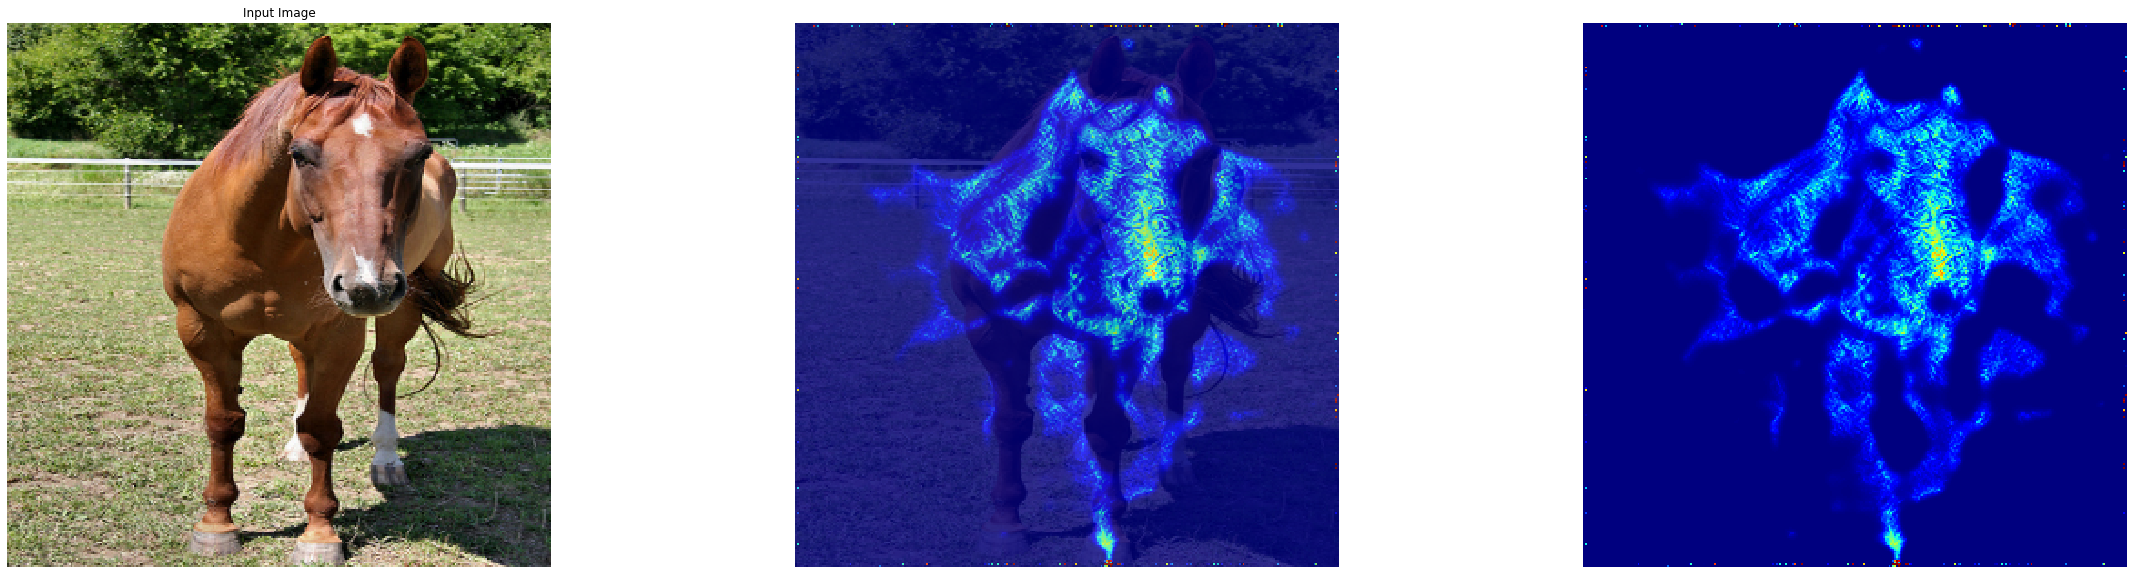

In [7]:
image_utils.display_image_and_mask(test_img, mask_result[-1])
None

## Try on another image

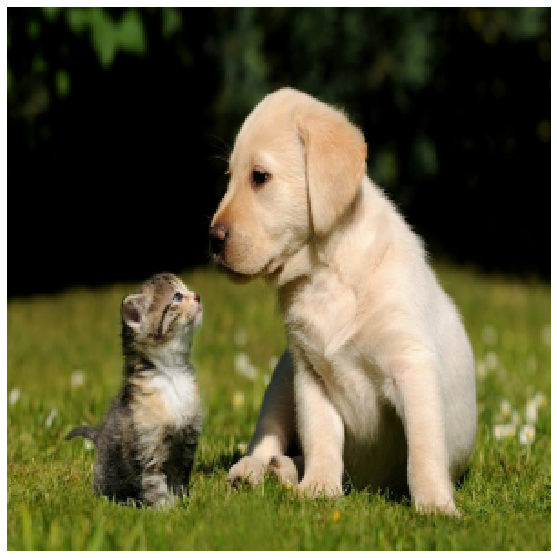

In [8]:
TEST_IMG_PATH = './images/cat_dog.jpg'
test_img = image_utils.load_image(TEST_IMG_PATH)
image_utils.display_image(test_img)
None

In [9]:
mask_net.init_model(sess)  # It is important to call this function eachtime befor running neuromask on a new input
mask_result =mask_net.explain(sess, test_img, iters=2000)


Original prediction =  [208]
0 - [222] - 606.3623657226562
50 - [222] - 601.7127685546875
100 - [208] - 549.123779296875
150 - [208] - 366.34808349609375
200 - [208] - 204.91470336914062
250 - [208] - 101.21868133544922
300 - [208] - 42.123836517333984
350 - [208] - 14.112975120544434
400 - [208] - 4.848554611206055
450 - [208] - 3.63193678855896
500 - [208] - 3.508033514022827
550 - [208] - 3.6185553073883057
600 - [208] - 3.2855749130249023
650 - [208] - 3.2027199268341064
700 - [208] - 3.108888626098633
750 - [208] - 3.076791524887085
800 - [208] - 2.926243543624878
850 - [208] - 2.935688018798828
900 - [208] - 2.7066078186035156
950 - [208] - 2.572939395904541
1000 - [208] - 2.481334924697876
1050 - [208] - 2.404806137084961
1100 - [208] - 2.2571194171905518
1150 - [208] - 2.1150166988372803
1200 - [208] - 2.00724720954895
1250 - [208] - 1.8445820808410645
1300 - [208] - 1.724293828010559
1350 - [208] - 1.6220922470092773
1400 - [208] - 1.4975665807724
1450 - [208] - 1.437457919120

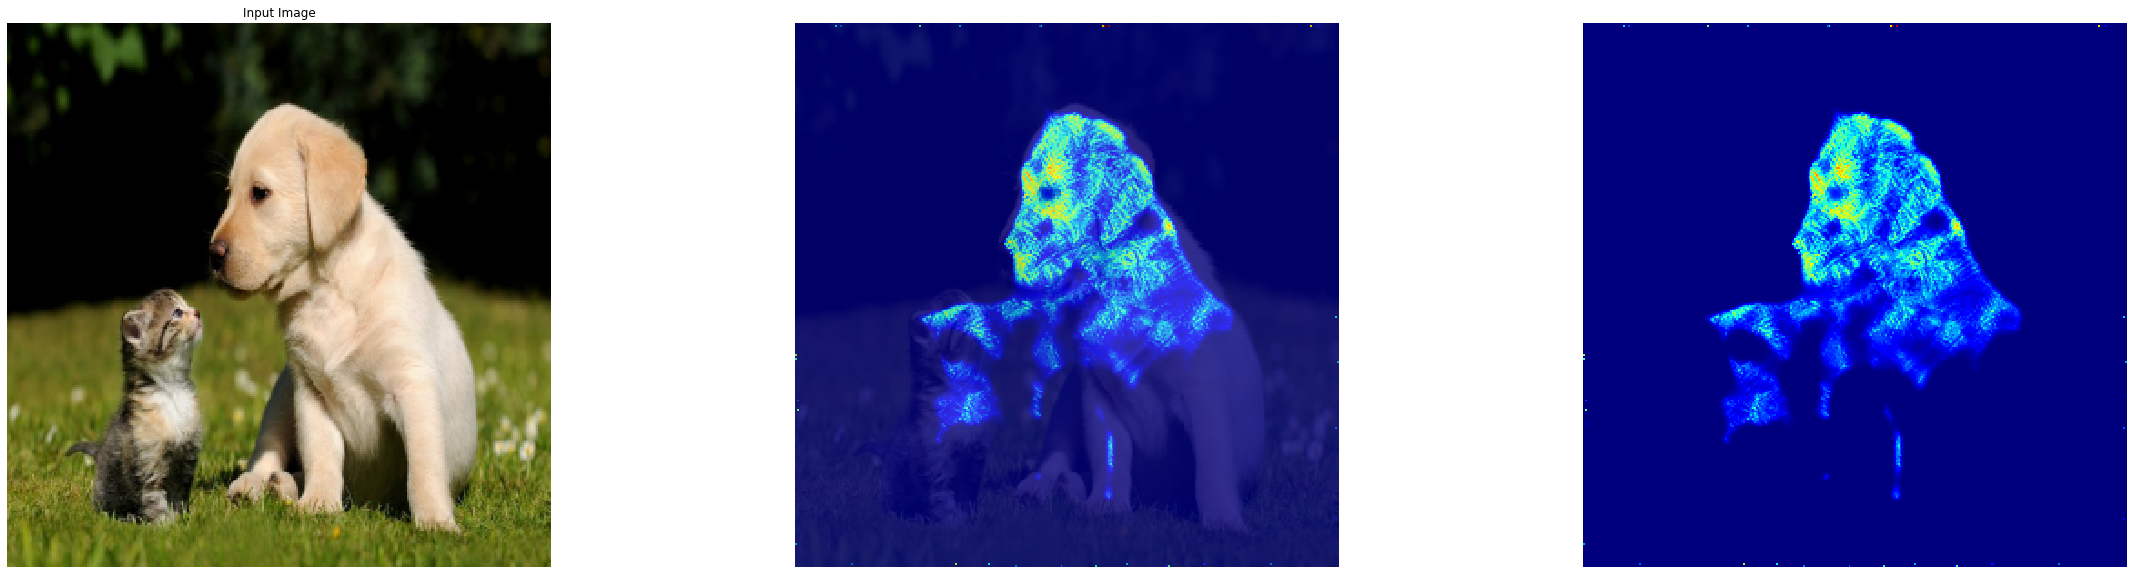

In [10]:
fig = image_utils.display_image_and_mask(test_img, mask_result[-1])
None